# Rocket Launch Delays Using Machine Learning

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
# Sklearn library contains all ML packages we need 
from sklearn import linear_model, model_selection, metrics
from sklearn.model_selection import train_test_split 
# ML libraries to build a decision tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
# Sklearn's preprocessing library is used for processing and cleaning data
from sklearn import preprocessing 
# visualising the tree
import pydotplus 
from IPython.display import Image

In [2]:
launch_data = pd.read_excel('RocketLaunchDataCompleted.xlsx')
launch_data.head()

,Name,Date,Time (East Coast),Location,Crewed or Uncrewed,Launched?,High Temp,Low Temp,Ave Temp,Temp at Launch Time,...,Max Wind Speed,Visibility,Wind Speed at Launch Time,Hist Ave Max Wind Speed,Hist Ave Visibility,Sea Level Pressure,Hist Ave Sea Level Pressure,Day Length,Condition,Notes
0,NaN,1958-12-04,NaN,Cape Canaveral,NaN,NaN,75.0,68.0,71.00,NaN,...,16.0,15.0,NaN,NaN,NaN,30.22,NaN,10:26:00,Cloudy,NaN
1,NaN,1958-12-05,NaN,Cape Canaveral,NaN,NaN,78.0,70.0,73.39,NaN,...,14.0,10.0,NaN,NaN,NaN,30.2,NaN,10:26:00,Cloudy,NaN
2,Pioneer 3,1958-12-06,01:45:00,Cape Canaveral,Uncrewed,Y,73.0,0.0,60.21,62.0,...,15.0,10.0,11.0,NaN,NaN,30.25,NaN,10:25:00,Cloudy,NaN
3,NaN,1958-12-07,NaN,Cape Canaveral,NaN,NaN,76.0,57.0,66.04,NaN,...,10.0,10.0,NaN,NaN,NaN,30.28,NaN,10:25:00,Partly Cloudy,NaN
4,NaN,1958-12-08,NaN,Cape Canaveral,NaN,NaN,79.0,60.0,70.52,NaN,...,12.0,10.0,NaN,NaN,NaN,30.23,NaN,12:24:00,Partly Cloudy,NaN


In [3]:
launch_data.columns

Index(['Name', 'Date', 'Time (East Coast)', 'Location', 'Crewed or Uncrewed',
       'Launched?', 'High Temp', 'Low Temp', 'Ave Temp', 'Temp at Launch Time',
       'Hist High Temp', 'Hist Low Temp', 'Hist Ave Temp',
       'Percipitation at Launch Time', 'Hist Ave Percipitation',
       'Wind Direction', 'Max Wind Speed', 'Visibility',
       'Wind Speed at Launch Time', 'Hist Ave Max Wind Speed',
       'Hist Ave Visibility', 'Sea Level Pressure',
       'Hist Ave Sea Level Pressure', 'Day Length', 'Condition', 'Notes'],
      dtype='object')

In [4]:
launch_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 26 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Name                          60 non-null     object        
 1   Date                          300 non-null    datetime64[ns]
 2   Time (East Coast)             59 non-null     object        
 3   Location                      300 non-null    object        
 4   Crewed or Uncrewed            60 non-null     object        
 5   Launched?                     60 non-null     object        
 6   High Temp                     299 non-null    float64       
 7   Low Temp                      299 non-null    float64       
 8   Ave Temp                      299 non-null    float64       
 9   Temp at Launch Time           59 non-null     float64       
 10  Hist High Temp                299 non-null    float64       
 11  Hist Low Temp                 29

- We see that the data includes 60 launches - the rest of the data is days before and after launch
- Hist Ave Max Wind Speed, Hist Ave Visibility and Hist Ave Sea Level Pressure have not data

Next we clean the data

In [5]:
values = {'Launched?':'N', 'Crewed or Uncrewed': 'Uncrewed', 'Wind Direction': 'Unknown', 'Condition': 'fair'}
launch_data.fillna(value=values, inplace=True)
launch_data.fillna(0, inplace=True) # replace any other missing data with 0
launch_data.head()

,Name,Date,Time (East Coast),Location,Crewed or Uncrewed,Launched?,High Temp,Low Temp,Ave Temp,Temp at Launch Time,...,Max Wind Speed,Visibility,Wind Speed at Launch Time,Hist Ave Max Wind Speed,Hist Ave Visibility,Sea Level Pressure,Hist Ave Sea Level Pressure,Day Length,Condition,Notes
0,0,1958-12-04,0,Cape Canaveral,Uncrewed,N,75.0,68.0,71.00,0.0,...,16.0,15.0,0.0,0.0,0.0,30.22,0.0,10:26:00,Cloudy,0
1,0,1958-12-05,0,Cape Canaveral,Uncrewed,N,78.0,70.0,73.39,0.0,...,14.0,10.0,0.0,0.0,0.0,30.2,0.0,10:26:00,Cloudy,0
2,Pioneer 3,1958-12-06,01:45:00,Cape Canaveral,Uncrewed,Y,73.0,0.0,60.21,62.0,...,15.0,10.0,11.0,0.0,0.0,30.25,0.0,10:25:00,Cloudy,0
3,0,1958-12-07,0,Cape Canaveral,Uncrewed,N,76.0,57.0,66.04,0.0,...,10.0,10.0,0.0,0.0,0.0,30.28,0.0,10:25:00,Partly Cloudy,0
4,0,1958-12-08,0,Cape Canaveral,Uncrewed,N,79.0,60.0,70.52,0.0,...,12.0,10.0,0.0,0.0,0.0,30.23,0.0,12:24:00,Partly Cloudy,0


In [6]:
launch_data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 26 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Name                          300 non-null    object        
 1   Date                          300 non-null    datetime64[ns]
 2   Time (East Coast)             300 non-null    object        
 3   Location                      300 non-null    object        
 4   Crewed or Uncrewed            300 non-null    object        
 5   Launched?                     300 non-null    object        
 6   High Temp                     300 non-null    float64       
 7   Low Temp                      300 non-null    float64       
 8   Ave Temp                      300 non-null    float64       
 9   Temp at Launch Time           300 non-null    float64       
 10  Hist High Temp                300 non-null    float64       
 11  Hist Low Temp                 30

To use our data we will replace text with numbers using [LabelEncoder()](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html) which encodes our text into numbers, we can reverese this transform if we want to see the corresponding text values

In [7]:
label_encoder = preprocessing.LabelEncoder()

# we have three columns to transform
launch_data['Crewed or Uncrewed'] = label_encoder.fit_transform(launch_data['Crewed or Uncrewed'])
launch_data['Wind Direction'] = label_encoder.fit_transform(launch_data['Wind Direction'])
launch_data['Condition'] = label_encoder.fit_transform(launch_data['Condition'])

launch_data.head()

,Name,Date,Time (East Coast),Location,Crewed or Uncrewed,Launched?,High Temp,Low Temp,Ave Temp,Temp at Launch Time,...,Max Wind Speed,Visibility,Wind Speed at Launch Time,Hist Ave Max Wind Speed,Hist Ave Visibility,Sea Level Pressure,Hist Ave Sea Level Pressure,Day Length,Condition,Notes
0,0,1958-12-04,0,Cape Canaveral,1,N,75.0,68.0,71.00,0.0,...,16.0,15.0,0.0,0.0,0.0,30.22,0.0,10:26:00,0,0
1,0,1958-12-05,0,Cape Canaveral,1,N,78.0,70.0,73.39,0.0,...,14.0,10.0,0.0,0.0,0.0,30.2,0.0,10:26:00,0,0
2,Pioneer 3,1958-12-06,01:45:00,Cape Canaveral,1,Y,73.0,0.0,60.21,62.0,...,15.0,10.0,11.0,0.0,0.0,30.25,0.0,10:25:00,0,0
3,0,1958-12-07,0,Cape Canaveral,1,N,76.0,57.0,66.04,0.0,...,10.0,10.0,0.0,0.0,0.0,30.28,0.0,10:25:00,6,0
4,0,1958-12-08,0,Cape Canaveral,1,N,79.0,60.0,70.52,0.0,...,12.0,10.0,0.0,0.0,0.0,30.23,0.0,12:24:00,6,0


Our curret data alone doesn't tell us about whether or not a launch was pushed back but using extra data could help, such as regional plane delay's, perhaps this could be used as an indicator?<br><br> One extra bit of information we could look at is whether or not there are particular seasons avoided for launches.

In [8]:
launch_locations = list(set(launch_data['Location'])) # sets only store unique values
print(launch_locations)

['Cape Canaveral', 'Kennedy']


In [9]:
# seperate launch locations
kennedy_launches = launch_data[launch_data['Location'] == 'Kennedy'] 
cape_launches = launch_data[launch_data['Location'] == 'Cape Canaveral']
# keep only days with successful launch
kennedy_launches = kennedy_launches[kennedy_launches['Launched?'] == 'Y']
cape_launches = cape_launches[cape_launches['Launched?'] == 'Y']

Text(0, 0.5, 'Frequency')

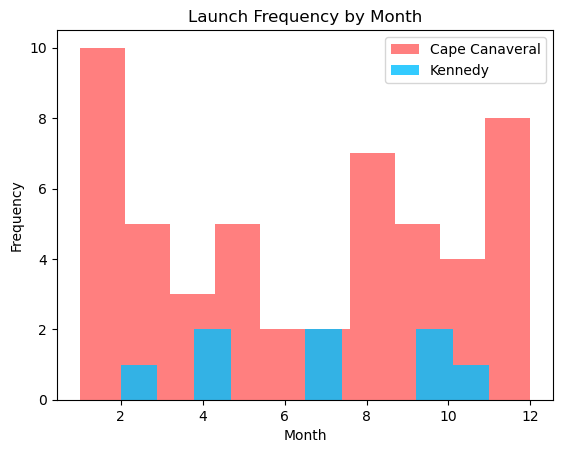

In [10]:
def plot_month_hist(df,column):
    dates = list(df[column])
    data = []
    for date in dates:
        data.append(date.month)
    return data

cape_dates = plot_month_hist(cape_launches,'Date')
kennedy_dates = plot_month_hist(kennedy_launches,'Date')

plt.hist([cape_dates], stacked=False, color='red', alpha=0.5, label='Cape Canaveral')
plt.hist([kennedy_dates], stacked=False, color='deepskyblue', alpha=0.8, label='Kennedy')
plt.legend(loc='best')
plt.title('Launch Frequency by Month')
plt.xlabel('Month')
plt.ylabel('Frequency')

## Bulding a model to predict launches

In [11]:
y = launch_data['Launched?'] # output we are trying to predict
launch_data.drop(['Name', 'Date', 'Time (East Coast)', 'Location', 'Launched?', 'Hist Ave Sea Level Pressure', 'Sea Level Pressure', 'Day Length', 'Notes', 'Hist Ave Visibility', 'Hist Ave Max Wind Speed'], axis=1, inplace=True)
x = launch_data # input without extra columns

Rocket launch is a two-class classification problem - launched or did not launch.

In [12]:
tree_model = DecisionTreeClassifier(random_state=0,max_depth=5) # creating decision tree classifier
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=99) # randomly splitting data, random_seed is the seed for random number generator 

In [13]:
tree_model.fit(x_train, y_train) # fit the model to training data

DecisionTreeClassifier(max_depth=5, random_state=0)

In [14]:
# testing the model
y_prediction = tree_model.predict(x_test)
tree_model.score(x_test,y_test)

0.9833333333333333

Good score on paper but one large issue is that we essentially guessed N for non-launch dates which at face value could imply these are bad days to launch, when in fact these N values close to the launch data are more likely to also be good launch days.

In [15]:
from sklearn.tree import export_graphviz # library to visualise decision tree

def tree_to_png(tree,feature_names,class_names,png_file_to_save):
    tree_str = export_graphviz(tree, feature_names=feature_names, class_names=class_names, filled=True, out_file=None)
    graph = pydotplus.graph_from_dot_data(tree_str)
    return Image(graph.create_png())


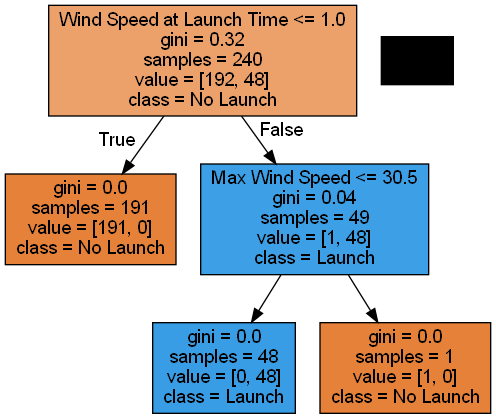

In [16]:
tree_to_png(tree=tree_model, feature_names=x.columns.values, class_names=['No Launch', 'Launch'], png_file_to_save='decision_tree.png')

It may seem odd that when wind speed is <= 1 then 191 samples out of 240 are no launch. We can verify this is expected with our particular dataset but intuitively this is isn't entirely logical.

In [17]:
low_wind_data = pd.read_excel('RocketLaunchDataCompleted.xlsx') # reimport data
low_wind_data = low_wind_data[['Launched?', 'Wind Speed at Launch Time']]

values = {'Launched?':'N', 'Wind Speed at Launch Time':0} # process data as before
low_wind_data.fillna(value=values, inplace=True)
low_wind_data = low_wind_data[low_wind_data['Wind Speed at Launch Time'] <= 1] # keep only days with wind speed <= 1

['N' 'Y'] [240   1]


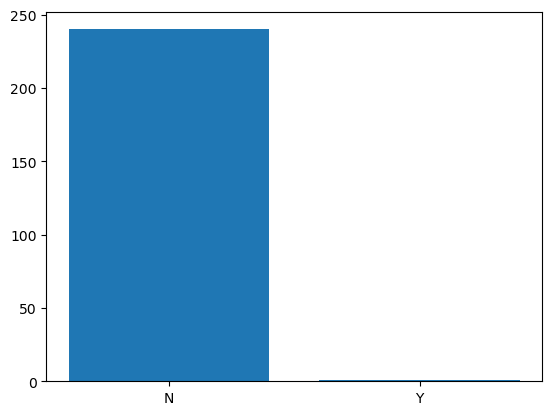

In [18]:
data = low_wind_data.iloc[:,0]
labels, freq = np.unique(data, return_counts=True)
print(labels, freq)
plt.bar(labels, freq, align='center')
plt.show()

The reason its not logical because as we set all NaN values to 0 when cleaning our data both times. Looking at the tree we see that for 191 launches all the data that is needed to make a prediction is that wind speed is <= 1, this is not a useful conclusion. More useful is the right branch, if wind speed is < 30.5 then we are more likely to launch, this is more useful.<br><br> Below we try to make an improvement by finding the average difference between Max Wind Speed and Wind Speed at Launch Time to make an estimate of an average value for wind speed at launch. We also look at other parameters which face the similar issue.

## Implementing Improvements

In [19]:
wind_df = launch_data[['Max Wind Speed', 'Wind Speed at Launch Time']]
wind_df = wind_df[wind_df['Wind Speed at Launch Time'] != 0.0] # only keep rows with non-zero wind speed at launch

# average difference between launch and max wind speed
wind_df = wind_df.assign(Difference=lambda x: x['Max Wind Speed'] - x['Wind Speed at Launch Time'],
                         ave_diff=lambda x: np.mean(x['Difference']))
            
ave_diff = wind_df.iloc[0,3]
wind_df = wind_df.assign(Execpted_launch_wind_speed=lambda x: x['Max Wind Speed'] - ave_diff)
wind_df.head()

,Max Wind Speed,Wind Speed at Launch Time,Difference,ave_diff,Execpted_launch_wind_speed
2,15.0,11.0,4.0,6.423729,8.576271
7,20.0,12.0,8.0,6.423729,13.576271
12,20.0,9.0,11.0,6.423729,13.576271
17,12.0,6.0,6.0,6.423729,5.576271
22,22.0,17.0,5.0,6.423729,15.576271


In [20]:
# replacing zeros with max wind speed - average difference 
mask = launch_data['Wind Speed at Launch Time'] == 0.0
launch_data.loc[mask,'Wind Speed at Launch Time'] = launch_data['Max Wind Speed'] - ave_diff
launch_data.head()

,Crewed or Uncrewed,High Temp,Low Temp,Ave Temp,Temp at Launch Time,Hist High Temp,Hist Low Temp,Hist Ave Temp,Percipitation at Launch Time,Hist Ave Percipitation,Wind Direction,Max Wind Speed,Visibility,Wind Speed at Launch Time,Condition
0,1,75.0,68.0,71.00,0.0,75.0,55.0,65.0,0.0,0.08,0,16.0,15.0,9.576271,0
1,1,78.0,70.0,73.39,0.0,75.0,55.0,65.0,0.0,0.09,0,14.0,10.0,7.576271,0
2,1,73.0,0.0,60.21,62.0,75.0,55.0,65.0,0.0,0.09,2,15.0,10.0,11.000000,0
3,1,76.0,57.0,66.04,0.0,75.0,55.0,65.0,0.0,0.08,1,10.0,10.0,3.576271,6
4,1,79.0,60.0,70.52,0.0,75.0,55.0,65.0,0.0,0.09,0,12.0,10.0,5.576271,6


In [21]:
x = launch_data # only update x, y is same as before

# rerunning the model
tree_model = DecisionTreeClassifier(random_state=0,max_depth=5) 
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=99) 

tree_model.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=0)

In [22]:
# testing the model
y_prediction = tree_model.predict(x_test)
tree_model.score(x_test,y_test)

0.9833333333333333

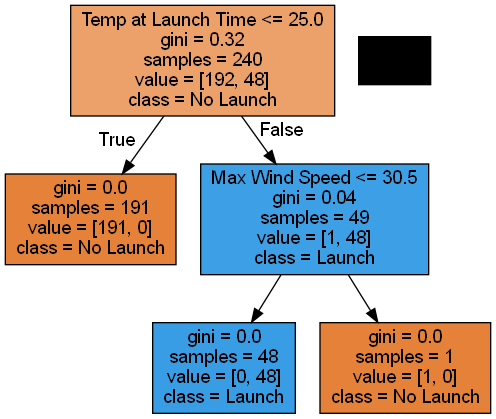

In [23]:
tree_to_png(tree=tree_model, feature_names=x.columns.values, class_names=['No Launch', 'Launch'], png_file_to_save='decision_tree2.png')

We see now that the temperature is the most important variable but otherwise this result is exactly the same as the initial model for the exact same reasons. Let's then look at all the other parameters and try to change this.

In [24]:
# replacing missing temperature at launch time (as an estimate) with the average temperature for that day
mask = launch_data['Temp at Launch Time'] == 0.0
launch_data.loc[mask,'Temp at Launch Time'] = launch_data['Ave Temp'] 
launch_data.head()

,Crewed or Uncrewed,High Temp,Low Temp,Ave Temp,Temp at Launch Time,Hist High Temp,Hist Low Temp,Hist Ave Temp,Percipitation at Launch Time,Hist Ave Percipitation,Wind Direction,Max Wind Speed,Visibility,Wind Speed at Launch Time,Condition
0,1,75.0,68.0,71.00,71.00,75.0,55.0,65.0,0.0,0.08,0,16.0,15.0,9.576271,0
1,1,78.0,70.0,73.39,73.39,75.0,55.0,65.0,0.0,0.09,0,14.0,10.0,7.576271,0
2,1,73.0,0.0,60.21,62.00,75.0,55.0,65.0,0.0,0.09,2,15.0,10.0,11.000000,0
3,1,76.0,57.0,66.04,66.04,75.0,55.0,65.0,0.0,0.08,1,10.0,10.0,3.576271,6
4,1,79.0,60.0,70.52,70.52,75.0,55.0,65.0,0.0,0.09,0,12.0,10.0,5.576271,6


In [36]:
# replacing missing percipitation at launch time (as an estimate) with the historical average percipitation for that day
mask = launch_data['Percipitation at Launch Time'] == 0.0
launch_data.loc[mask,'Percipitation at Launch Time'] = launch_data['Hist Ave Percipitation'] 
launch_data.head()

,Crewed or Uncrewed,High Temp,Low Temp,Ave Temp,Temp at Launch Time,Hist High Temp,Hist Low Temp,Hist Ave Temp,Percipitation at Launch Time,Hist Ave Percipitation,Wind Direction,Max Wind Speed,Visibility,Wind Speed at Launch Time,Condition
0,1,75.0,68.0,71.00,71.00,75.0,55.0,65.0,0.08,0.08,0,16.0,15.0,9.576271,0
1,1,78.0,70.0,73.39,73.39,75.0,55.0,65.0,0.09,0.09,0,14.0,10.0,7.576271,0
2,1,73.0,0.0,60.21,62.00,75.0,55.0,65.0,0.09,0.09,2,15.0,10.0,11.000000,0
3,1,76.0,57.0,66.04,66.04,75.0,55.0,65.0,0.08,0.08,1,10.0,10.0,3.576271,6
4,1,79.0,60.0,70.52,70.52,75.0,55.0,65.0,0.09,0.09,0,12.0,10.0,5.576271,6


In [26]:
x = launch_data # only update x, y is same as before

# rerunning the model
tree_model = DecisionTreeClassifier(random_state=0,max_depth=5) 
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=99) 

tree_model.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=0)

In [27]:
# testing the model
y_prediction = tree_model.predict(x_test)
tree_model.score(x_test,y_test)

0.8166666666666667

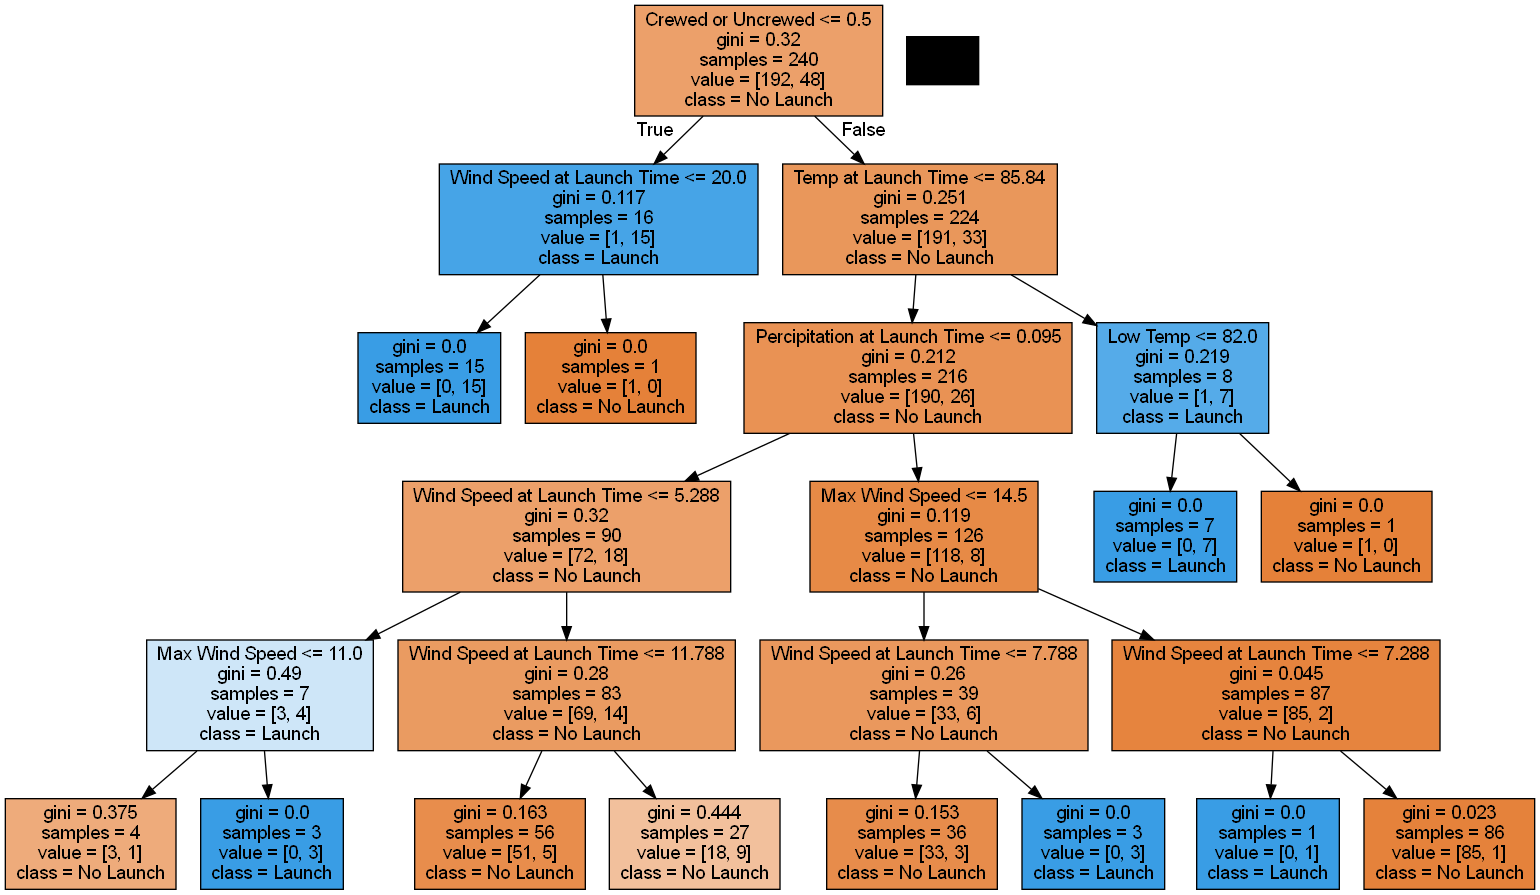

In [28]:
tree_to_png(tree=tree_model, feature_names=x.columns.values, class_names=['No Launch', 'Launch'], png_file_to_save='decision_tree3.png')

This is a much deeper tree. We see that the score is lower which is expected and that the new most important variable is whether or not the mission is crewed. However, in actuality whether or not the mission is crewed or not should not have a large impact on whether or not the mission is delayed, rather we would expect external factors such as weather to be more important.<br><br>Its possible that crewed missions are more likely to be delayed due to the possibility in loss of life but arguably this isn't really what we should train our model on. Its important to think about what we want our model to do. Do we just want to predict whether or not a rocket will be delay or are we more interested in the role of external factors that impact rocket delays, perhaps the latter is something more insightful.

## Testing

NASA launched the perseverence rover to Mars from Cape Canveral on July 20th 2020 at 7:50 AM Eastern time. After gathering the data for that particular day we test our model.

In [31]:
# ['Crewed or Uncrewed', 'High Temp', 'Low Temp','Ave Temp', 'Temp at Launch Time', 'Hist High Temp', 'Hist Low Temp', 'Hist Ave Temp', 'Percipitation at Launch Time',
# 'Hist Ave Percipitation', 'Wind Direction', 'Max Wind Speed', 'Visibility', 'Wind Speed at Launch Time', 'Condition']

data_input = [1., 87., 79., 84.06, 83, 99, 68, 83.2, 0, 0.08, 0, 15, 10, 6, 3]

tree_model.predict([data_input])

c:\Users\afsho\anaconda3\envs\miniproj\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['N'], dtype=object)